In [1]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

# 数据预处理
## 从数据库获取数据

In [2]:
def getdata():
    data = []
    db = pymysql.connect(host='1.119.44.200',port=30002,user='root',passwd='bdctableau',db='data_portal')
    cursor = db.cursor()
    sql = "select * from ads_all_d_zc_tsg_zjc_fssj order by fssj asc"
    try:
        cursor.execute(sql)
        for line in cursor.fetchall():
            data.append(line)
    except Exception as e:
        print(e)
        db.rollback()
    db.close()
    
    Time = ['']*len(data)
    Cont = ['']*len(data)

    for i in range(len(data)):
        Time[i] = pd.to_datetime(data[i][0])
        Cont[i] = int(data[i][1])
    df = pd.DataFrame({'Date':Time,'Cont':Cont})
    
    return df[90:190]

In [3]:
df = getdata()
df.head()

,Date,Cont
90,2020-09-13,7568
91,2020-09-14,6565
92,2020-09-15,6155
93,2020-09-16,6834
94,2020-09-17,6741


## 绘制查看数据

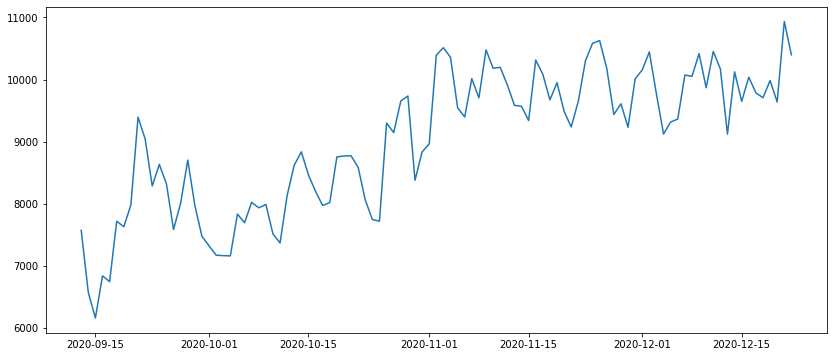

In [4]:
dfindex = df.set_index('Date')
plt.style.use({'figure.figsize':(14,6)})
# plt.plot(dfindex['2020-09-01':'2021-01-15']['Cont'])
plt.plot(dfindex['Cont'])

## 特征工程

In [5]:
dfDate = df
dfDate.head()

,Date,Cont
90,2020-09-13,7568
91,2020-09-14,6565
92,2020-09-15,6155
93,2020-09-16,6834
94,2020-09-17,6741


In [6]:
def large_season(yf):
        #季节
    if  yf>=3 and yf<=5:
        jj=1
    elif yf>=6 and yf<=8:
        jj=2
    elif yf>=9 and yf<=11:
        jj=3
    else:
        jj=4
    return jj

def large_term(yf):
        #学期
    if  yf>=9 and yf<=12:
        xq=1
    elif yf>=1 and yf<=2:
        xq=2
    elif yf>=3 and yf<=6:
        xq=3
    else:
        xq=4
    return xq

def Isexammonth(yf):
    if yf==12:
        return 1
    else:
        return 0

In [7]:
dfDate['Date'] = pd.to_datetime(dfDate['Date'])
dfDate.loc[:,'Year'] = dfDate['Date'].apply(lambda x:x.year)
dfDate.loc[:,'Month'] = dfDate['Date'].apply(lambda x:x.month)
dfDate.loc[:,'Day'] = dfDate['Date'].apply(lambda x:x.day)
dfDate.loc[:,'Weekday'] = dfDate['Date'].apply(lambda x:x.dayofweek+1)
dfDate.loc[:,'Season'] = dfDate['Month'].apply(lambda x:large_season(x))
dfDate.loc[:,'Term'] = dfDate['Month'].apply(lambda x:large_term(x))
dfDate.loc[:,'Exammonth'] = dfDate['Month'].apply(lambda x:Isexammonth(x))

dfDate

,Date,Cont,Year,Month,Day,Weekday,Season,Term,Exammonth
90,2020-09-13,7568,2020,9,13,7,3,1,0
91,2020-09-14,6565,2020,9,14,1,3,1,0
92,2020-09-15,6155,2020,9,15,2,3,1,0
93,2020-09-16,6834,2020,9,16,3,3,1,0
94,2020-09-17,6741,2020,9,17,4,3,1,0
...,...,...,...,...,...,...,...,...,...
185,2020-12-18,9706,2020,12,18,5,4,1,1
186,2020-12-19,9984,2020,12,19,6,4,1,1
187,2020-12-20,9637,2020,12,20,7,4,1,1
188,2020-12-21,10936,2020,12,21,1,4,1,1


# LSTM

#  深层神经网络

In [ ]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler

In [ ]:
columns = list(dfDate.columns.values)
columns_to_encoding = columns[2:]
x = dfDate[columns_to_encoding[1:]]
y = dfDate['Cont']

In [ ]:
x.shape

(100, 6)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
# feature = scale(x)
# y = scale(y)
# feature = x
feature = scaler.fit_transform(x.values.reshape(-1,6))
y_sc = scaler.fit_transform(y.values.reshape(-1,1))
x_train,x_test,y_train,y_test = train_test_split(feature,y,test_size=0.2,random_state=1,shuffle=True)

In [ ]:
x_train.shape

(80, 6)

In [ ]:
x_train

array([[0.        , 0.46666667, 0.16666667, 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.83333333, 0.5       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.63333333, 1.        , 1.        , 0.        ,
        1.        ],
       [0.66666667, 0.46666667, 1.        , 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.06666667, 0.83333333, 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.6       , 0.        , 0.        , 0.        ,
        0.        ],
       [1.        , 0.53333333, 0.5       , 1.        , 0.        ,
        1.        ],
       [0.33333333, 0.33333333, 1.        , 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.96666667, 0.66666667, 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.7       , 0.5       , 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.63333333, 0.66666667, 0.        , 0.        ,
        0.        ],
       [1.        , 0

In [ ]:
y_sc

array([[0.29554487],
       [0.08575612],
       [0.        ],
       [0.1420205 ],
       [0.1225685 ],
       [0.32629157],
       [0.30767622],
       [0.38171931],
       [0.67726417],
       [0.60426689],
       [0.44509517],
       [0.51788329],
       [0.45262497],
       [0.29847312],
       [0.38694834],
       [0.53252458],
       [0.38004602],
       [0.27525622],
       [0.2116712 ],
       [0.21020707],
       [0.20937042],
       [0.35034512],
       [0.32106254],
       [0.39008576],
       [0.3714704 ],
       [0.38276511],
       [0.28341351],
       [0.25308513],
       [0.41351182],
       [0.51558251],
       [0.56034302],
       [0.48190755],
       [0.4271073 ],
       [0.37920937],
       [0.38924911],
       [0.5431918 ],
       [0.54632922],
       [0.5469567 ],
       [0.50784355],
       [0.39782472],
       [0.33193892],
       [0.32650073],
       [0.65739385],
       [0.62518302],
       [0.7316461 ],
       [0.74858816],
       [0.464338  ],
       [0.559

In [ ]:
model = Sequential()

model.add(layers.Dense(128,activation='relu',input_shape=(x_train.shape[1],)))
model.add(layers.Dense(196,activation='relu'))
model.add(layers.Dense(1))

model.compile(loss='mse',optimizer=SGD(lr=0.001),metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               896       
_________________________________________________________________
dense_1 (Dense)              (None, 196)               25284     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 197       
Total params: 26,377
Trainable params: 26,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network_history = model.fit(x_train,y_train,batch_size=4,epochs=500,verbose=1,validation_data=(x_test,y_test))

Epoch 1/500
20/20 [==============================] - 0s 12ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/500
20/20 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/500
20/20 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/500
20/20 [==============================] - 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/500
20/20 [==============================] - 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/500
20/20 [============================

KeyboardInterrupt: 

In [ ]:
weight_Dense,bias_Dense = model.get_layer('dense').get_weights()
weight_Dense_1,bias_Dense_1 = model.get_layer('dense_1').get_weights()

In [ ]:
weight_Dense

In [ ]:
weight_Dense_1

In [ ]:
dfDate

In [ ]:
model.predict(x_train)

In [ ]:
y_test